<a href="https://colab.research.google.com/github/lxxhxng/aipython/blob/main/240115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import tree
import matplotlib.pyplot as plt

# 드라이브 mount

In [9]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


# 예측 모델 만들기

## 키와 몸무게 데이터를 측정하여 키 값에 대한 몸무게를 예측

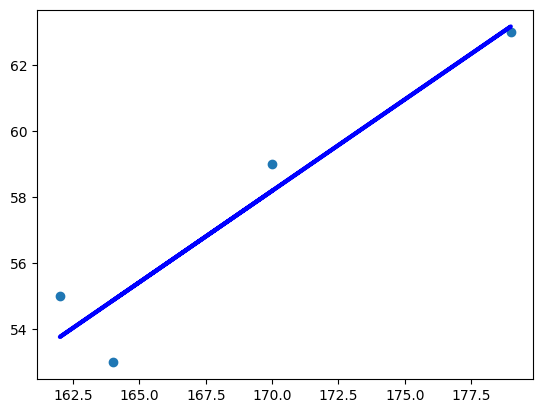

In [2]:
regr = linear_model.LinearRegression()
X = [[164], [179], [162], [170]]
y = [53, 63, 55, 59]
regr.fit(X, y)
plt.scatter(X, y)
y_pred = regr.predict(X)
plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

## 재배 면적에 대한 수확량 예측

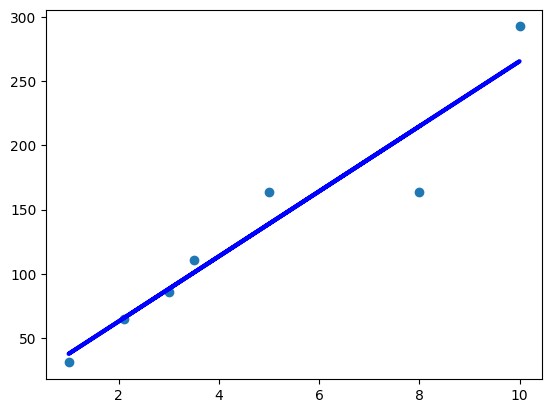

[189.55106566 316.14785212]


In [17]:
regr = linear_model.LinearRegression()
X = np.array([[2.1],[10],[3],[1],[3.5],[5],[8]], dtype=float)
y = np.array([64.9,292.6,85.9,30.92,110.5,163.4,163.4], dtype=float)
regr.fit(X, y)
plt.scatter(X, y)
y_pred = regr.predict(X)
plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

dt_pred=regr.predict([[7],[12]])
print(dt_pred)

## 부모의 키 데이터를 측정하여 자녀의 키가 속하는 그룹을 예측

In [4]:
parents_height = [[180,165],[175, 160],[180,172],[165,160],[171,152]]
child_height = [3,2,2,1,1]
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(parents_height, child_height)
dt_pred=dt_model.predict([[175,153]])
dt_pred

array([2])

# 예측하는 인공지능

## 학생의 과목수와 공부시간으로 시험 점수 예측

In [12]:
df_std = pd.read_csv('/content/gdrive/MyDrive/겨울계절_파이썬기초/Student_Marks.csv')
df_std

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [18]:
df_std.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [19]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [20]:
df_std.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [21]:
df_std.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [23]:
df_std.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


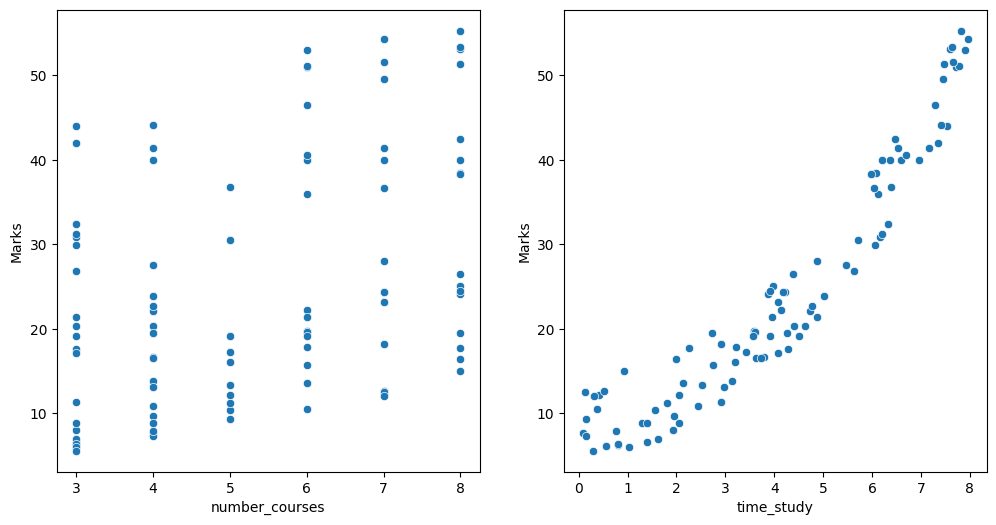

In [27]:
fig, ax=plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(data=df_std, x='number_courses',y='Marks', ax=ax[0])
sns.scatterplot(data=df_std, x='time_study',y='Marks', ax=ax[1])
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
x=df_std.drop('Marks',axis=1)
y=df_std['Marks']
X_train, X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [32]:
lr_model.fit(X_train,Y_train)

LinearRegression()

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr_pred=lr_model.predict(X_test)
r2_score(lr_pred, Y_test)

0.9219617777759717

In [34]:
mean_squared_error(lr_pred, Y_test)

14.200726136374552

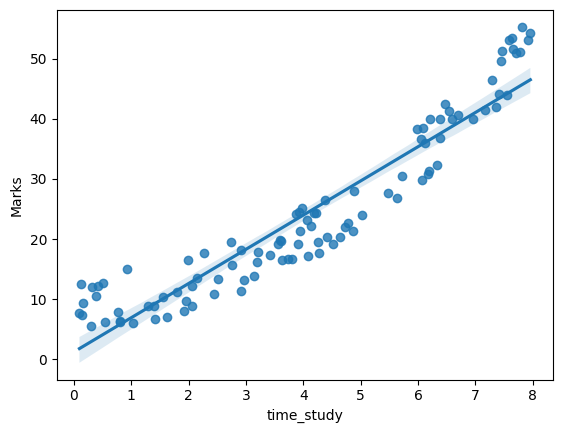

In [36]:
sns.regplot(x=df_std['time_study'],y=df_std['Marks'])
plt.show()